In [ ]:

%pip install pandas


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


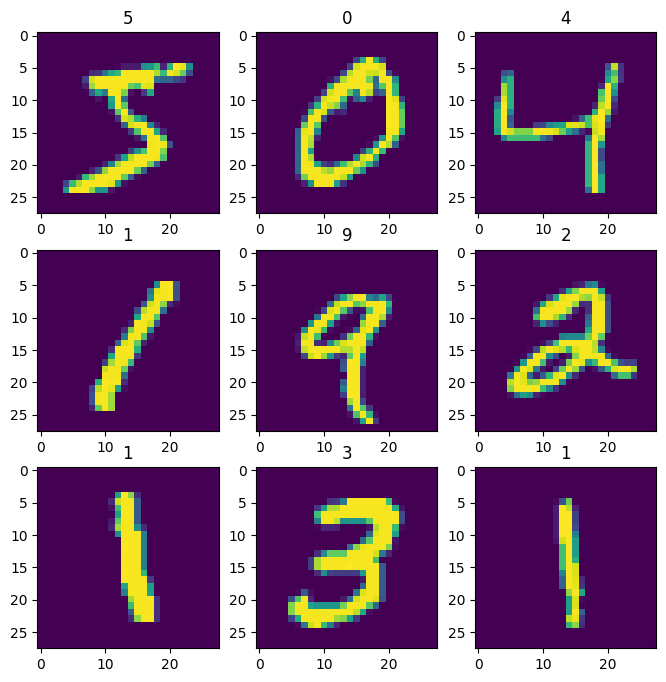

In [ ]:
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  plt.title(y_train[i])

In [ ]:
#normliaze them
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_train, axis=1)

**Bulding the model**

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) #one single one-d array 28*28
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs = 3) #fit the model = train the model, epochs = how the model is seeing the data

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9826 - loss: 0.0548
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9866 - loss: 0.0423
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9892 - loss: 0.0334


In [ ]:
import cv2

In [ ]:
image = cv2.imread('9.png')[:,:,0]
image = np.invert(np.array([image]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
9


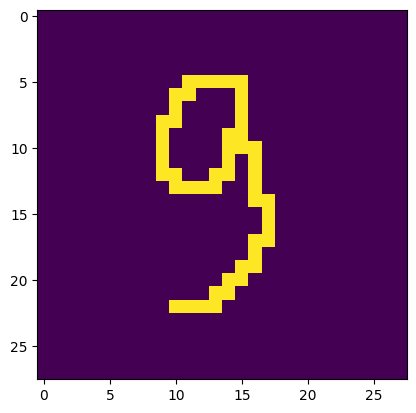

In [ ]:
output = model.predict(image)
plt.imshow(image[0])
print(np.argmax(output))

In [ ]:
model.save('/content/handwrittenDigit_model.keras')

In [ ]:
%pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [ ]:
!rm -rf ~/.ngrok2

In [ ]:
!pip install pyngrok

In [ ]:
!ngrok config add-authtoken 2s7kG7kVRmeAf5ztfNsnK0d9uM9_yp9v1Q4267FrHS9YLXYg

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!cat /root/.config/ngrok/ngrok.yml

region: us
version: '2'
authtoken: 2s7kG7kVRmeAf5ztfNsnK0d9uM9_yp9v1Q4267FrHS9YLXYg


In [ ]:
!streamlit run /content/app.py &> logs.txt &

In [ ]:
from pyngrok import ngrok
ngrok.kill()


In [ ]:
from pyngrok import ngrok

public_url = ngrok.connect(8505)
print(f"Access your app at: {public_url}")



Access your app at: NgrokTunnel: "https://93f4-34-19-11-118.ngrok-free.app" -> "http://localhost:8505"
